# 从生物到人工神经元

In [1]:
#from tensorflow.examples.tutorials.mnist import input_data
#import numpy as np

In [2]:
#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [4]:
per_clf.coef_

array([[-1.1, -1.2]])

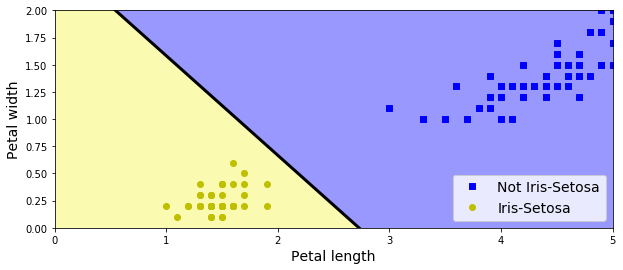

In [5]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0,5,0,2]
x0,x1 = np.meshgrid(
    np.linspace(axes[0],axes[1],500).reshape(-1,1),
    np.linspace(axes[2],axes[3],200).reshape(-1,1),
)
X_new = np.c_[x0.ravel(),x1.ravel()]
y_pred = per_clf.predict(X_new)
zz = y_pred.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[:,0][y==0], X[:,1][y==0], "bs", label="Not Iris-Setosa")
plt.plot(X[:,0][y==1], X[:,1][y==1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0,x1,zz,cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()


In [6]:
import tensorflow as tf

In [14]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

11493376/11490434 [==============================] - 238s 21us/step


In [15]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_model_dir': 'C:\\Users\\ADMINI~1\\AppData\\Local\\Temp\\tmpyu2vy20f', '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': '', '_num_worker_replicas': 1, '_device_fn': None, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_tf_random_seed': None, '_session_config': None, '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_is_chief': True, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000253F1AA6CF8>, '_train_distribute': None, '_task_id': 0, '_num_ps_replicas': 0, '_task_type': 'worker', '_global_id_in_cluster': 0}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 

INFO:tensorflow:global_step/sec: 407.791
INFO:tensorflow:loss = 0.7482954, step = 7200 (0.244 sec)
INFO:tensorflow:global_step/sec: 416.288
INFO:tensorflow:loss = 1.5273508, step = 7300 (0.241 sec)
INFO:tensorflow:global_step/sec: 434.387
INFO:tensorflow:loss = 0.8051361, step = 7400 (0.229 sec)
INFO:tensorflow:global_step/sec: 428.794
INFO:tensorflow:loss = 1.2266047, step = 7500 (0.233 sec)
INFO:tensorflow:global_step/sec: 436.282
INFO:tensorflow:loss = 4.6328263, step = 7600 (0.230 sec)
INFO:tensorflow:global_step/sec: 430.645
INFO:tensorflow:loss = 1.6389444, step = 7700 (0.232 sec)
INFO:tensorflow:global_step/sec: 436.285
INFO:tensorflow:loss = 0.81546265, step = 7800 (0.229 sec)
INFO:tensorflow:global_step/sec: 432.507
INFO:tensorflow:loss = 1.1114086, step = 7900 (0.230 sec)
INFO:tensorflow:global_step/sec: 434.386
INFO:tensorflow:loss = 0.13192184, step = 8000 (0.230 sec)
INFO:tensorflow:global_step/sec: 434.388
INFO:tensorflow:loss = 0.89820325, step = 8100 (0.230 sec)
INFO:te

INFO:tensorflow:global_step/sec: 419.786
INFO:tensorflow:loss = 0.083868116, step = 15400 (0.238 sec)
INFO:tensorflow:global_step/sec: 426.962
INFO:tensorflow:loss = 0.05537948, step = 15500 (0.233 sec)
INFO:tensorflow:global_step/sec: 430.643
INFO:tensorflow:loss = 0.040721737, step = 15600 (0.232 sec)
INFO:tensorflow:global_step/sec: 436.284
INFO:tensorflow:loss = 0.0579057, step = 15700 (0.229 sec)
INFO:tensorflow:global_step/sec: 432.507
INFO:tensorflow:loss = 0.16280572, step = 15800 (0.231 sec)
INFO:tensorflow:global_step/sec: 436.285
INFO:tensorflow:loss = 0.041685775, step = 15900 (0.230 sec)
INFO:tensorflow:global_step/sec: 432.507
INFO:tensorflow:loss = 0.11599426, step = 16000 (0.230 sec)
INFO:tensorflow:global_step/sec: 428.794
INFO:tensorflow:loss = 0.15134749, step = 16100 (0.234 sec)
INFO:tensorflow:global_step/sec: 436.284
INFO:tensorflow:loss = 0.05198746, step = 16200 (0.228 sec)
INFO:tensorflow:global_step/sec: 434.387
INFO:tensorflow:loss = 0.106217295, step = 16300

INFO:tensorflow:global_step/sec: 432.507
INFO:tensorflow:loss = 0.056901272, step = 23500 (0.232 sec)
INFO:tensorflow:global_step/sec: 434.387
INFO:tensorflow:loss = 0.10435172, step = 23600 (0.229 sec)
INFO:tensorflow:global_step/sec: 430.643
INFO:tensorflow:loss = 0.031252615, step = 23700 (0.232 sec)
INFO:tensorflow:global_step/sec: 434.387
INFO:tensorflow:loss = 0.011731651, step = 23800 (0.231 sec)
INFO:tensorflow:global_step/sec: 432.506
INFO:tensorflow:loss = 0.07782184, step = 23900 (0.231 sec)
INFO:tensorflow:global_step/sec: 421.557
INFO:tensorflow:loss = 0.027530598, step = 24000 (0.237 sec)
INFO:tensorflow:global_step/sec: 419.786
INFO:tensorflow:loss = 0.06697631, step = 24100 (0.237 sec)
INFO:tensorflow:global_step/sec: 436.284
INFO:tensorflow:loss = 0.04859285, step = 24200 (0.230 sec)
INFO:tensorflow:global_step/sec: 436.284
INFO:tensorflow:loss = 0.04794877, step = 24300 (0.228 sec)
INFO:tensorflow:global_step/sec: 436.285
INFO:tensorflow:loss = 0.050664537, step = 244

INFO:tensorflow:global_step/sec: 432.507
INFO:tensorflow:loss = 0.043624315, step = 31600 (0.230 sec)
INFO:tensorflow:global_step/sec: 432.508
INFO:tensorflow:loss = 0.030025948, step = 31700 (0.232 sec)
INFO:tensorflow:global_step/sec: 430.643
INFO:tensorflow:loss = 0.009478785, step = 31800 (0.232 sec)
INFO:tensorflow:global_step/sec: 428.794
INFO:tensorflow:loss = 0.02852099, step = 31900 (0.232 sec)
INFO:tensorflow:global_step/sec: 432.507
INFO:tensorflow:loss = 0.009608684, step = 32000 (0.231 sec)
INFO:tensorflow:global_step/sec: 434.387
INFO:tensorflow:loss = 0.03136772, step = 32100 (0.231 sec)
INFO:tensorflow:global_step/sec: 432.508
INFO:tensorflow:loss = 0.032229383, step = 32200 (0.230 sec)
INFO:tensorflow:global_step/sec: 432.505
INFO:tensorflow:loss = 0.0021479966, step = 32300 (0.232 sec)
INFO:tensorflow:global_step/sec: 430.644
INFO:tensorflow:loss = 0.019506399, step = 32400 (0.232 sec)
INFO:tensorflow:global_step/sec: 430.642
INFO:tensorflow:loss = 0.049098026, step =

INFO:tensorflow:loss = 0.003207035, step = 39600 (0.231 sec)
INFO:tensorflow:global_step/sec: 436.285
INFO:tensorflow:loss = 0.031836778, step = 39700 (0.229 sec)
INFO:tensorflow:global_step/sec: 432.506
INFO:tensorflow:loss = 0.030326812, step = 39800 (0.231 sec)
INFO:tensorflow:global_step/sec: 434.387
INFO:tensorflow:loss = 0.004678718, step = 39900 (0.230 sec)
INFO:tensorflow:global_step/sec: 434.388
INFO:tensorflow:loss = 0.058152262, step = 40000 (0.230 sec)
INFO:tensorflow:global_step/sec: 434.387
INFO:tensorflow:loss = 0.023847014, step = 40100 (0.230 sec)
INFO:tensorflow:global_step/sec: 430.643
INFO:tensorflow:loss = 0.006236989, step = 40200 (0.233 sec)
INFO:tensorflow:global_step/sec: 428.794
INFO:tensorflow:loss = 0.058521785, step = 40300 (0.232 sec)
INFO:tensorflow:global_step/sec: 428.794
INFO:tensorflow:loss = 0.019964837, step = 40400 (0.234 sec)
INFO:tensorflow:global_step/sec: 426.963
INFO:tensorflow:loss = 0.013231721, step = 40500 (0.233 sec)
INFO:tensorflow:globa

In [16]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-25-10:32:32
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ADMINI~1\AppData\Local\Temp\tmpyu2vy20f\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-25-10:32:32
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9786, average_loss = 0.109947875, global_step = 44000, loss = 13.917453
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: C:\Users\ADMINI~1\AppData\Local\Temp\tmpyu2vy20f\model.ckpt-44000


In [17]:
eval_results

{'accuracy': 0.9786,
 'average_loss': 0.109947875,
 'global_step': 44000,
 'loss': 13.917453}

In [18]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ADMINI~1\AppData\Local\Temp\tmpyu2vy20f\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'class_ids': array([7], dtype=int64),
 'classes': array([b'7'], dtype=object),
 'logits': array([-10.444026 ,  -1.4194546,  -3.8225117,  -1.8988857,  -2.5842462,
        -10.273938 , -29.265461 ,  21.936684 ,  -5.40219  ,   3.0749438],
       dtype=float32),
 'probabilities': array([8.6543821e-15, 7.1871717e-11, 6.5001533e-12, 4.4498332e-11,
        2.2423102e-11, 1.0259001e-14, 5.7968377e-23, 1.0000000e+00,
        1.3392989e-12, 6.4335453e-09], dtype=float32)}

In [37]:
np.argmax(y_pred[0]["probabilities"])

7

In [38]:
y_test[0]

7